In [14]:
from circuit_knitting.cutting.cut_finding.LO_gate_cut_optimizer.circuit_interface import SimpleGateList
from circuit_knitting.cutting.cut_finding.LO_gate_cut_optimizer.optimization_settings import OptimizationSettings
from circuit_knitting.cutting.cut_finding.LO_gate_cut_optimizer.lo_cuts_only_optimizer import LOCutsOnlyOptimizer
from circuit_knitting.cutting.cut_finding.LO_gate_cut_optimizer.quantum_device_constraints import DeviceConstraints

## Cut finding for efficient SU(2) Circuit from tutorial 1.

### Visualize the circuit

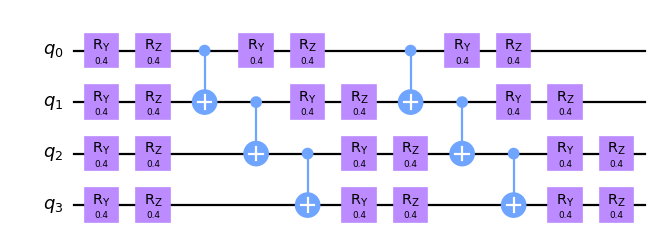

In [27]:
from qiskit.circuit.library import EfficientSU2
from circuit_knitting.cutting.cut_finding.LO_gate_cut_optimizer.utils import QCtoCCOCircuit

qc = EfficientSU2(4, entanglement="linear", reps=2).decompose()
qc.assign_parameters([0.4] * len(qc.parameters), inplace=True)

circuit_ckt_su2=QCtoCCOCircuit(qc)

qc.draw("mpl", scale=0.8)

### Perform cut finding

In [28]:
interface = SimpleGateList(circuit_ckt_su2)

settings = OptimizationSettings(rand_seed = 12345)

settings.setEngineSelection('CutOptimization', 'BestFirst')

qubits_per_QPU=4
num_QPUs=2


for num_qpus in range(num_QPUs, 1, -1):
    for qpu_qubits in range(qubits_per_QPU, 1, -1):
        print(f'\n\n--- {qpu_qubits} Qubits per QPU, {num_qpus} QPUs ---')
        
        constraint_obj = DeviceConstraints(qubits_per_QPU = qpu_qubits, 
                                            num_QPUs       = num_QPUs)

        op = LOCutsOnlyOptimizer(interface, 
                        settings, 
                        constraint_obj)
        
        out = op.optimize()

        print('Gamma =', None if (out is None) else out.upperBoundGamma(),
              ', min_reached =', op.minimumReached())
        if (out is not None):
            out.print(simple=True)
        else:
            print(out)
        
        print('Subcircuits:', 
              interface.exportSubcircuitsAsString(name_mapping='default'),'\n')




--- 4 Qubits per QPU, 2 QPUs ---
Gamma = 1.0 , min_reached = True
[]
Subcircuits: AAAA 



--- 3 Qubits per QPU, 2 QPUs ---
Gamma = 9.0 , min_reached = True
[Cut(Action='CutTwoQubitGate', Gate=[17, ['cx', 2, 3]]), Cut(Action='CutTwoQubitGate', Gate=[25, ['cx', 2, 3]])]
Subcircuits: AAAB 



--- 2 Qubits per QPU, 2 QPUs ---
Gamma = 9.0 , min_reached = True
[Cut(Action='CutTwoQubitGate', Gate=[9, ['cx', 1, 2]]), Cut(Action='CutTwoQubitGate', Gate=[20, ['cx', 1, 2]])]
Subcircuits: AABB 



## Cut finding for 7 qubit circuit from Tutorial 3.

### Create and visualize the circuit

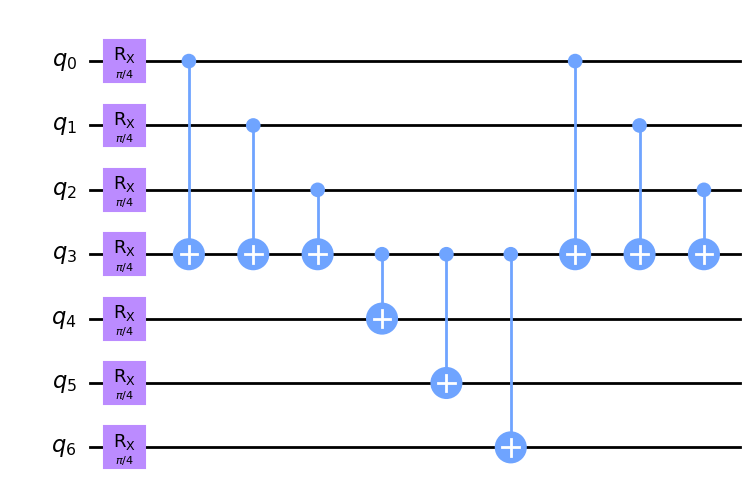

In [24]:
import numpy as np
from qiskit import QuantumCircuit

qc_0 = QuantumCircuit(7)
for i in range(7):
    qc_0.rx(np.pi / 4, i)
qc_0.cx(0, 3)
qc_0.cx(1, 3)
qc_0.cx(2, 3)
qc_0.cx(3, 4)
qc_0.cx(3, 5)
qc_0.cx(3, 6)
qc_0.cx(0, 3)
qc_0.cx(1, 3)
qc_0.cx(2, 3)

qc_0.draw("mpl")

### Perform cut finding

In [26]:
circuit_cktq7=QCtoCCOCircuit(qc_0)

interface = SimpleGateList(circuit_cktq7)

settings = OptimizationSettings(rand_seed = 12345)

settings.setEngineSelection('CutOptimization', 'BestFirst')



qubits_per_QPU=7
num_QPUs=2



for num_qpus in range(num_QPUs, 1, -1):
    for qpu_qubits in range(qubits_per_QPU, 1, -1):
        print(f'\n\n--- {qpu_qubits} Qubits per QPU, {num_qpus} QPUs ---')
        
        constraint_obj = DeviceConstraints(qubits_per_QPU = qpu_qubits, 
                                            num_QPUs       = num_QPUs)

        op = LOCutsOnlyOptimizer(interface, 
                        settings, 
                        constraint_obj)
        
        out = op.optimize()

        print('Gamma =', None if (out is None) else out.upperBoundGamma(),
              ', min_reached =', op.minimumReached())
        if (out is not None):
           out.print(simple=True)
        else:
            print(out)

        print('Subcircuits:', 
              interface.exportSubcircuitsAsString(name_mapping='default'),'\n')



--- 7 Qubits per QPU, 2 QPUs ---
Gamma = 1.0 , min_reached = True
[]
Subcircuits: AAAAAAA 



--- 6 Qubits per QPU, 2 QPUs ---
Gamma = 3.0 , min_reached = True
[Cut(Action='CutTwoQubitGate', Gate=[12, ['cx', 3, 6]])]
Subcircuits: AAAAAAB 



--- 5 Qubits per QPU, 2 QPUs ---
Gamma = 9.0 , min_reached = True
[Cut(Action='CutTwoQubitGate', Gate=[10, ['cx', 3, 4]]), Cut(Action='CutTwoQubitGate', Gate=[12, ['cx', 3, 6]])]
Subcircuits: AAAABAC 



--- 4 Qubits per QPU, 2 QPUs ---
Gamma = 27.0 , min_reached = True
[Cut(Action='CutTwoQubitGate', Gate=[10, ['cx', 3, 4]]), Cut(Action='CutTwoQubitGate', Gate=[11, ['cx', 3, 5]]), Cut(Action='CutTwoQubitGate', Gate=[12, ['cx', 3, 6]])]
Subcircuits: AAAABCD 



--- 3 Qubits per QPU, 2 QPUs ---
Gamma = 243.0 , min_reached = True
[Cut(Action='CutTwoQubitGate', Gate=[9, ['cx', 2, 3]]), Cut(Action='CutTwoQubitGate', Gate=[10, ['cx', 3, 4]]), Cut(Action='CutTwoQubitGate', Gate=[11, ['cx', 3, 5]]), Cut(Action='CutTwoQubitGate', Gate=[12, ['cx', 3, 6]]),